# Introduction to Statistics 
- Summarizing data. 
- Plotting data.
- Confidence intervals.
- Statistical tests.

#### About this Notebook
In this notebook, we download a dataset with data about customers. Then, we calculate statistical measures and plot distributions. Finally, we perform statistical tests.

### Importing needed packages
Statsmodels is a Python module that allows users to explore data, estimate statistical models, and perform statistical tests. 

In [1]:
# Uncomment next command if you need to install a missing module
#!pip install statsmodels
import requests
import matplotlib.pyplot as plt
import pandas as pd
try:
    import statsmodels.api as sm
except:
    !pip install statsmodels
    import statsmodels.api as sm
import numpy as np
%matplotlib inline


## Downloading and Understanding the Data

### `customer_dbase_sel.csv`:
We have downloaded an extract from IBM SPSS sample dataset with customer data, **`customer_dbase_sel.csv`**, which contains customer-specific data such as age, income, credit card spendings, commute type and time, etc. [Dataset source](http://www-01.ibm.com/support/knowledgecenter/SSLVMB_20.0.0/com.ibm.spss.statistics.help/data_files.htm)

- **custid** e.g. 0648-AIPJSP-UVM (customer id)
- **gender** e.g. Female or Male
- **age** e.g. 26
- **debtinc** e.g. 11.1 (debt to income ratio in %)
- **card** e.g. Visa, Mastercard (type of primary credit card)
- **carditems** e.g. 1, 2, 3 ... (# of primary credit card purchases in the last month)
- **cardspent** e.g 228.27 (amount in \$ spent on the primary credit card last month)
- **commute** e.g. Walk, Car, Bus (commute type)
- **commutetime** e.g. 22 (time in minutes to commute to work)
- **income** e.g. 16.00 (income in thousands \$ per year)
- **edcat** e.g. College degree, Post-undergraduate degree (education level)

Download data

In [2]:
# Download data file
url = 'https://raw.githubusercontent.com/OlekRomanko/teaching/master/datasets/customer_dbase_sel.csv'
r = requests.get(url, allow_redirects=True)
open('customer_dbase_sel.csv', 'wb').write(r.content)

1116177

## Reading the data in

In [3]:
df = pd.read_csv("customer_dbase_sel.csv")

# display first 5 rows of the dataset
df.head()

,custid,gender,age,age_cat,debtinc,card,carditems,cardspent,cardtype,creddebt,...,carown,region,ed_cat,ed_years,job_cat,employ_years,emp_cat,retire,annual_income,inc_cat
0,3964-QJWTRG-NPN,Female,20,18-24,11.1,Mastercard,5,81.66,None,1.20,...,Own,Zone 1,Some college,15,Managerial and Professional,0,Less than 2,No,31000.0,$25 - $49
1,0648-AIPJSP-UVM,Male,22,18-24,18.6,Visa,5,42.60,Other,1.22,...,Own,Zone 5,College degree,17,Sales and Office,0,Less than 2,No,15000.0,Under $25
2,5195-TLUDJE-HVO,Female,67,>65,9.9,Visa,9,184.22,None,0.93,...,Own,Zone 3,High school degree,14,Sales and Office,16,More than 15,No,35000.0,$25 - $49
3,4459-VLPQUH-3OL,Male,23,18-24,5.7,Visa,17,340.99,None,0.02,...,Own,Zone 4,Some college,16,Sales and Office,0,Less than 2,No,20000.0,Under $25
4,8158-SMTQFB-CNO,Male,26,25-34,1.7,Discover,8,255.10,Gold,0.21,...,Lease,Zone 2,Some college,16,Sales and Office,1,Less than 2,No,23000.0,Under $25


### Data Exploration

In [4]:
# Summarize the data
df.describe()

,age,debtinc,carditems,cardspent,creddebt,commutetime,card2items,card2spent,cars,ed_years,employ_years,annual_income
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,46.939800,9.957800,10.19920,339.635878,1.874982,25.346739,4.666000,161.331270,2.134200,14.537600,9.740200,5.504060e+04
std,17.703312,6.423173,3.39279,248.382982,3.441425,5.890674,2.482434,146.798035,1.306037,3.294717,9.691062,5.554475e+04
min,18.000000,0.000000,0.00000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,6.000000,0.000000,9.000000e+03
25%,32.000000,5.175000,8.00000,184.860000,0.390000,21.000000,3.000000,67.682500,1.000000,12.000000,2.000000,2.400000e+04
50%,46.000000,8.800000,10.00000,278.655000,0.930000,25.000000,5.000000,125.455000,2.000000,14.000000,7.000000,3.800000e+04
75%,62.000000,13.500000,12.00000,422.402500,2.080000,29.000000,6.000000,208.612500,3.000000,17.000000,15.000000,6.700000e+04
max,79.000000,43.100000,23.00000,3926.410000,109.070000,48.000000,15.000000,2069.250000,8.000000,23.000000,52.000000,1.073000e+06


In [5]:
# Number of rows and columns in the data
df.shape

(5000, 30)

In [6]:
# Display column names
df.columns

Index(['custid', 'gender', 'age', 'age_cat', 'debtinc', 'card', 'carditems',
       'cardspent', 'cardtype', 'creddebt', 'commute', 'commutetime', 'card2',
       'card2items', 'card2spent', 'card2type', 'marital', 'homeown',
       'hometype', 'cars', 'carown', 'region', 'ed_cat', 'ed_years', 'job_cat',
       'employ_years', 'emp_cat', 'retire', 'annual_income', 'inc_cat'],
      dtype='object')

### Labeling Data

income > 30000  --> High-income --> 1  
income < 30000  --> Low-income  --> 0

In [7]:
# To label data into high-income and low-income
df['income_category'] = df['annual_income'].map(lambda x: 1 if x>30000 else 0)
df[['annual_income','income_category']].head()

,annual_income,income_category
0,31000.0,1
1,15000.0,0
2,35000.0,1
3,20000.0,0
4,23000.0,0


## Data Exploration
#### Select 4 data columns for visualizing:

In [8]:
viz = df[['cardspent','debtinc','carditems','commutetime']]
viz.head()

,cardspent,debtinc,carditems,commutetime
0,81.66,11.1,5,22.0
1,42.60,18.6,5,29.0
2,184.22,9.9,9,24.0
3,340.99,5.7,17,38.0
4,255.10,1.7,8,32.0


#### Compute descriptive statistics for the data:

In [9]:
viz.describe()

,cardspent,debtinc,carditems,commutetime
count,5000.000000,5000.000000,5000.00000,4998.000000
mean,339.635878,9.957800,10.19920,25.346739
std,248.382982,6.423173,3.39279,5.890674
min,0.000000,0.000000,0.00000,7.000000
25%,184.860000,5.175000,8.00000,21.000000
50%,278.655000,8.800000,10.00000,25.000000
75%,422.402500,13.500000,12.00000,29.000000
max,3926.410000,43.100000,23.00000,48.000000


Drop NaN (Not-a-Number) observations:

In [10]:
df[['commutetime']].dropna().count()

commutetime    4998
dtype: int64

Print observations with NaN `commutetime`:

In [11]:
print( df[np.isnan(df["commutetime"])] )

               custid  gender  age age_cat  debtinc      card  carditems  \
965   3622-JHDLVP-V1E  Female   48   35-49      6.5  Discover         12   
2734  0860-BRGALK-LLR  Female   68     >65     17.3     Other          8   

      cardspent  cardtype  creddebt  ...  region          ed_cat ed_years  \
965      261.91  Platinum      2.25  ...  Zone 1  College degree       19   
2734     178.75  Platinum      1.08  ...  Zone 5    Some college       15   

                                    job_cat  employ_years       emp_cat  \
965                                 Service            12      11 to 15   
2734  Operation, Fabrication, General Labor            20  More than 15   

     retire annual_income     inc_cat  income_category  
965      No      121000.0  $75 - $124                1  
2734    Yes       23000.0   Under $25                0  

[2 rows x 31 columns]


#### Visualize data:

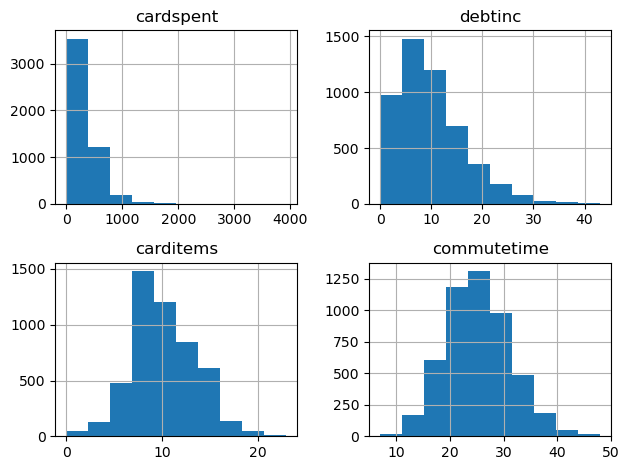

In [12]:
viz.hist()
plt.tight_layout()
plt.show()

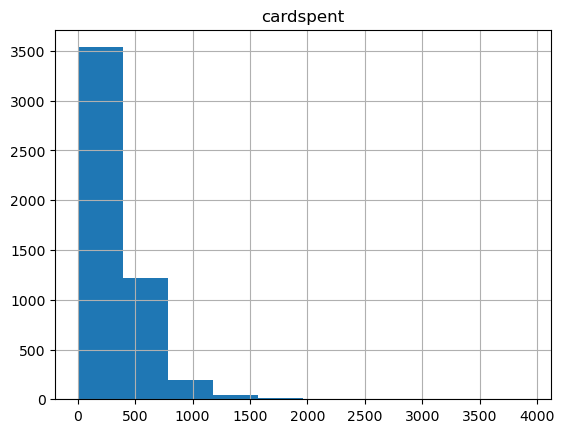

In [13]:
df[['cardspent']].hist()
plt.show()

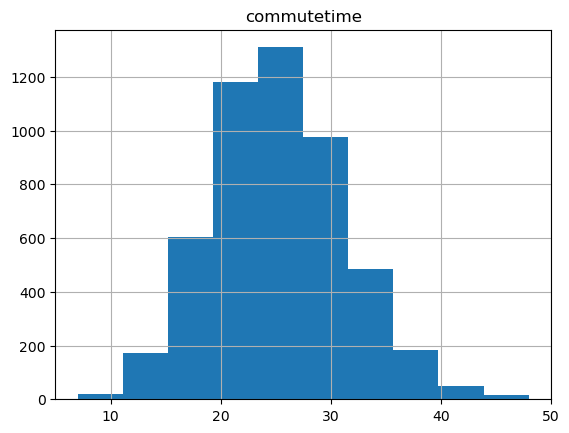

In [14]:
df[['commutetime']].hist()
plt.show()

## Confidence Intervals

For computing confidence intervals and performing simple statistical tests, we will use the `stats` sub-module of `scipy`:

In [15]:
from scipy import stats

Confidence intervals tell us how close we think the mean is to the true value, with a certain level of confidence.

We compute mean `mu`, standard deviation `sigma` and the number of observations `N` in our sample of the debt-to-income ratio:

In [16]:
mu, sigma = np.mean(df[['debtinc']],axis=0), np.std(df[['debtinc']])
print ("mean = %G, st. dev = %g" % (mu, sigma))


mean = 9.9578, st. dev = 6.42253


In [17]:
N = len(df[['debtinc']])
N

5000

The 95% confidence interval for the mean of `N` draws from a Normal distribution with mean `mu` and standard deviation `sigma` is

In [18]:
conf_int = stats.norm.interval( 0.95, loc = mu, scale = sigma/np.sqrt(N) )
conf_int

(array([9.7797798]), array([10.1358202]))

In [19]:
print ("95%% confidence interval for the mean of debt to income ratio = [%g %g]" % (conf_int[0], conf_int[1]))

95% confidence interval for the mean of debt to income ratio = [9.77978 10.1358]


## Statistical Tests

Select columns by name:

In [20]:
adf=df[['gender','cardspent','debtinc']]
print(adf['gender'])

0       Female
1         Male
2       Female
3         Male
4         Male
         ...  
4995      Male
4996      Male
4997    Female
4998    Female
4999    Female
Name: gender, Length: 5000, dtype: object


Compute means for `cardspent` and `debtinc` for the male and female populations:

In [21]:
gender_data = adf.groupby('gender')
print (gender_data.mean())

         cardspent   debtinc
gender                      
Female  323.343489  9.985221
Male    356.606840  9.929236


Compute mean for `cardspent` for female population only:

In [22]:
adf[adf['gender'] == 'Female']['cardspent'].mean()

323.3434888279106

We have seen above that the mean `cardspent` and `debtinc` in the male and female populations were different. To test if this is significant, we do a 2-sample t-test with `scipy.stats.ttest_ind()`:

In [23]:
female_card = adf[adf['gender'] == 'Female']['cardspent']
male_card = adf[adf['gender'] == 'Male']['cardspent']
tc, pc = stats.ttest_ind(female_card, male_card)
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = -4.74396  p = 2.15418e-06


In the case of amount spent on primary credit card, we conclude that men tend to charge more on their primary card (`p-value = 2e-6 < 0.05`, statistically significant).

In [24]:
female_debt = adf[adf['gender'] == 'Female']['debtinc']
male_debt   = adf[adf['gender'] == 'Male']['debtinc']
td, pd      = stats.ttest_ind(female_debt, male_debt)
print ("t-test: t = %g  p = %g" % (td, pd))

t-test: t = 0.308069  p = 0.758043


In the case of debt-to-income ratio, we conclude that there is no significant difference between men and women (`p-value = 0.758 > 0.05`, not statistically significant).

## Plot Data

### Plot statistical measures for amounts spent on primary credit card

#### Use `boxplot` to compare medians, 25% and 75% percentiles, 12.5% and 87.5% percentiles:

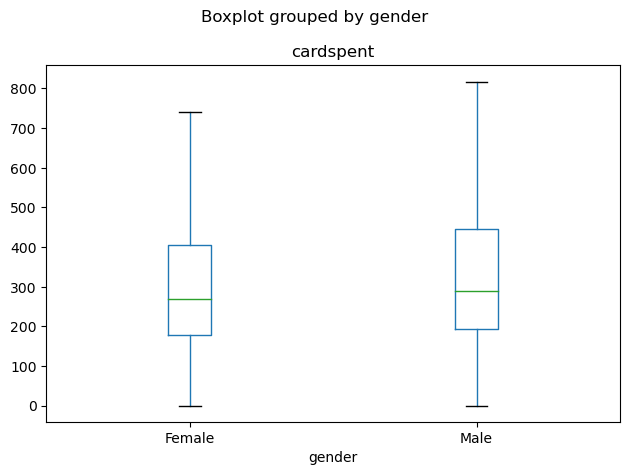

In [25]:
adf.boxplot(column='cardspent', by='gender', grid=False, showfliers=False)
plt.tight_layout()
plt.show()

#### Plot observations with `boxplot`:

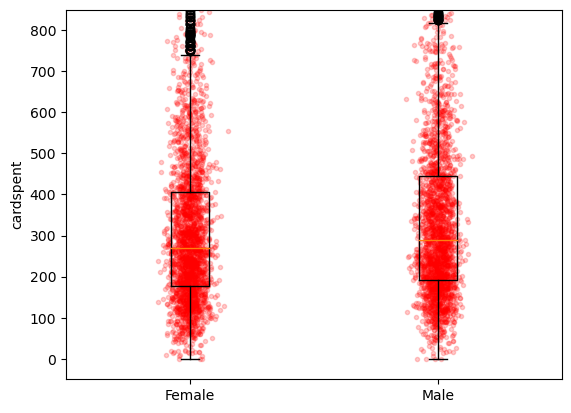

In [26]:
gend = list(['Female', 'Male'])
for i in [1,2]:
    y = adf.cardspent[adf.gender==gend[i-1]].dropna()        
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'r.', alpha=0.2)
plt.boxplot([female_card,male_card],labels=gend)
plt.ylabel("cardspent")
plt.ylim((-50,850))    
plt.show()

### Plot age vs. income data to find some interesting relationships.

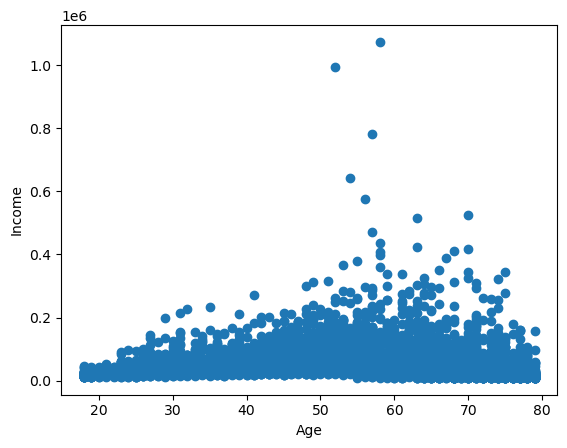

In [27]:
plt.scatter(df.age, df.annual_income)
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()